<a href="https://colab.research.google.com/github/Soumiak/CHECK_POINT2_PYTHON/blob/main/CHECK_POINT_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
%matplotlib inline



In [46]:
data=pd.read_csv('kc_house_data.csv')

In [47]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.shape

(21613, 21)

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


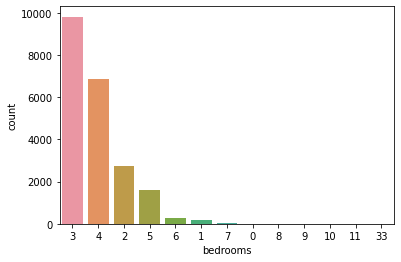

In [7]:
sns.countplot(data.bedrooms,order=data['bedrooms'].value_counts().index)

In [76]:
data['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

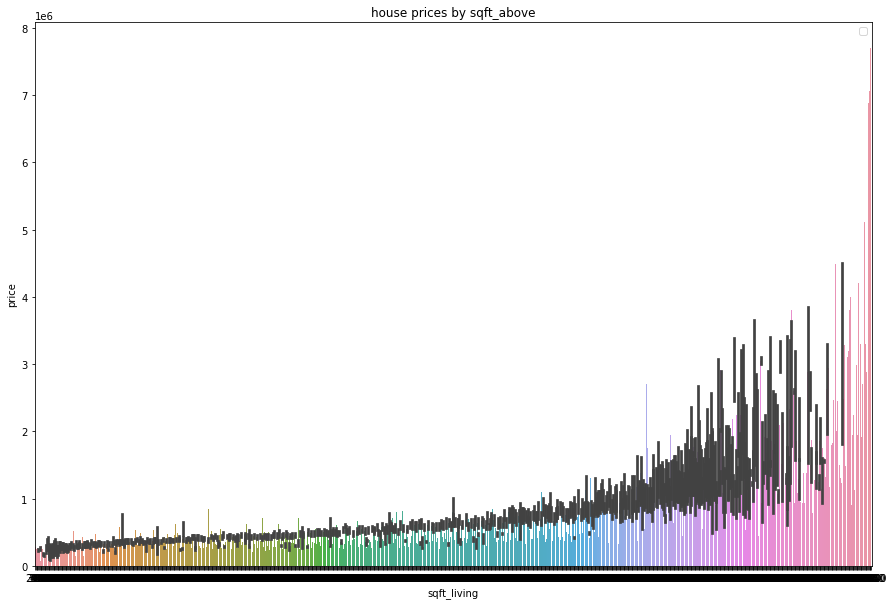

In [77]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
plt.legend()
sns.barplot(x='sqft_living',y='price',data=data)

let's drop the ID column and the date column. We should also drop the sqft_above column since that depends linearly on the othe square foot measurements.
Sqft_above and sqft_living are too highly correlated, so one must be removed

In [48]:
data=data.drop(['id'],axis=1)
data=data.drop(['date'],axis=1)
data=data.drop(['sqft_above'], axis=1)

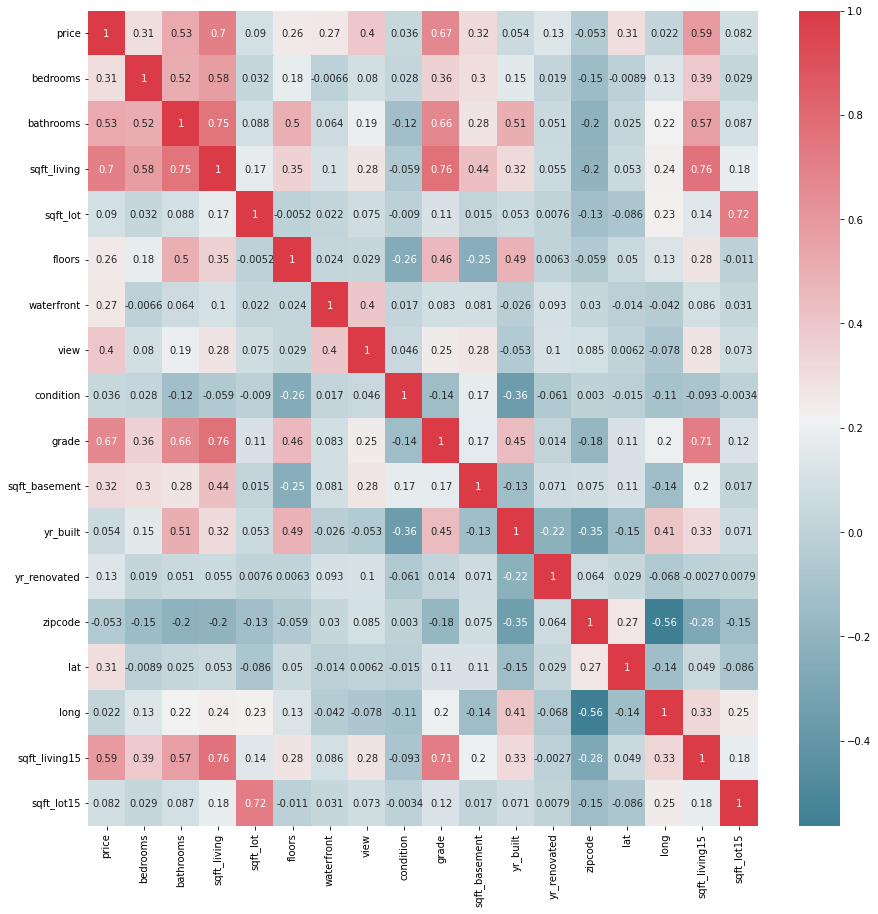

In [49]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


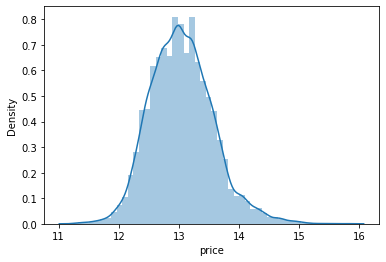

In [50]:
data.price = np.log(data.price)
sns.distplot(data.price);

outlayers 


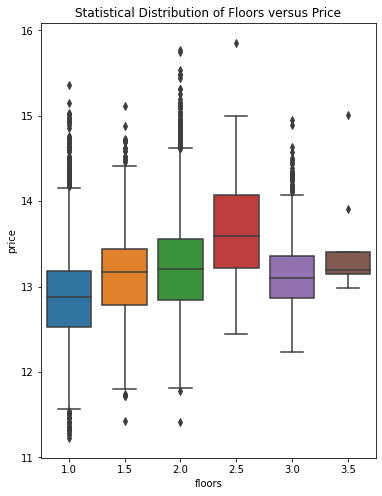

In [51]:
plt.figure(figsize=(6,8))
sns.boxplot( x=data['floors'], y=data['price'] )
plt.title('Statistical Distribution of Floors versus Price')
plt.show();

In [30]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.120700e+04,21207.000000,21207.000000,21207.000000,2.120700e+04,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000,21207.000000
mean,5.068452e+05,3.353704,2.086446,2032.091998,1.483464e+04,1.487080,0.004338,0.205640,3.407648,7.604282,280.775169,1970.932145,80.083227,98078.277125,47.558949,-122.213645,1960.339322,12642.182958
std,2.593258e+05,0.921360,0.737261,837.153739,4.041000e+04,0.538614,0.065723,0.707947,0.649105,1.111342,425.359837,29.283480,391.694537,53.399423,0.139467,0.141539,655.343610,27224.262776
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.005000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1951.000000,0.000000,98033.000000,47.467000,-122.329000,1480.000000,5080.000000
50%,4.470000e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,0.000000,1975.000000,0.000000,98065.000000,47.569900,-122.231000,1820.000000,7577.000000
75%,6.273750e+05,4.000000,2.500000,2500.000000,1.049200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,540.000000,1996.000000,0.000000,98118.000000,47.678700,-122.124000,2330.000000,10000.000000
max,1.640000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


linear regression


In [69]:
X = data.sqft_living.values.reshape(-1,1)
Y = data.price

In [70]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.3, random_state=30)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 1)
(6484, 1)
(15129,)
(6484,)


In [72]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [73]:
predection=model.predict(X_test)

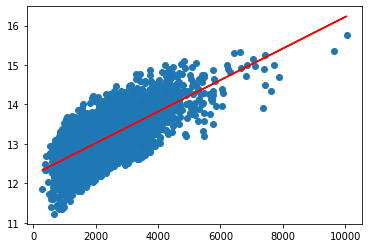

In [74]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,predection,c='r')


In [75]:
r2_score(Y_test,predection)

0.4837851116893558

splting data


In [60]:
X = data.drop(columns=['price'])
Y = data.price

In [61]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.3, random_state=12)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 17)
(6484, 17)
(15129,)
(6484,)


In [63]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [64]:
predection=model.predict(X_test)

AttributeError: ignored

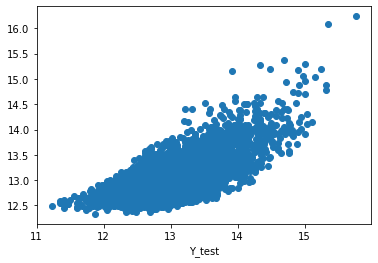

In [77]:
plt.scatter(Y_test,predection)


In [66]:
r2_score(Y_test,predection)

0.7713771798677109

polynomial regression

In [90]:
poly= PolynomialFeatures(2)

In [122]:
X = data.drop(columns=['price'])
Y = data.price

In [123]:
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.3, random_state=12)

In [124]:
x_poly = poly.fit_transform(X_train)
x_poly_test = poly.fit_transform(X_test)
 

In [125]:
model = LinearRegression()
model.fit(x_poly, Y_train)
y_poly_pred = model.predict(x_poly_test)

In [126]:
r2_score(Y_test,y_poly_pred)

0.819965401956064